# DSc Assignment 4

## Survival Analysis

In [2]:
# Data taken from http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Survival/BS704_Survival_print.html

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from random import sample

In [4]:
time = [0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 23, 24]
nt =  [20, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 7, 6, 5, 4, 3]
dt = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

df = pd.DataFrame({'Time':time,
                   'Number at Risk':nt,
                   'Number of Deaths':dt})

In [5]:
df

,Time,Number at Risk,Number of Deaths
0,0,20,0
1,1,20,1
2,2,19,0
3,3,18,1
4,5,17,1
5,6,16,0
6,9,15,0
7,10,14,0
8,11,13,0
9,12,12,0


$S_{t-1} = S_t * ((N_{t+1} - D_{t+1})/N_{t+1})$

In [6]:
def survival(df):
    # see formula above
    surv = [1]
    for i in range(1,df.shape[0]):
        temp = surv[i-1] * ((df.iloc[i,1] - df.iloc[i,2])/ df.iloc[i,1])
        surv.append(temp)
    return surv

In [7]:
surv = survival(df)

In [8]:
surv

[1,
 0.95,
 0.95,
 0.8972222222222221,
 0.8444444444444443,
 0.8444444444444443,
 0.8444444444444443,
 0.8444444444444443,
 0.8444444444444443,
 0.8444444444444443,
 0.8444444444444443,
 0.7599999999999999,
 0.6755555555555555,
 0.6755555555555555,
 0.6755555555555555,
 0.6755555555555555,
 0.5066666666666666,
 0.5066666666666666]

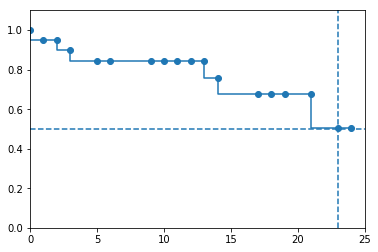

In [9]:
plt.step(df[['Time']], surv, linestyle = '-', marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,25])
plt.axhline(0.5,linestyle = '--')
plt.axvline(23, linestyle = '--')

In [10]:
# The median survival time is 23 years

# Logrank Test

In [11]:
# For the logrank test, we take two groups and compare their survival
# data is again taken from the above mentioned link

In [12]:
time = [8,12,14,21,26,27,28,33,41]
n1t = [10,8,7,5,4,3,2,1,0]
n2t = [10,10,10,10,8,8,8,7,5]
nt = [20,18,17,15,12,11,10,8,5]
o1t = [1,1,1,1,1,1,0,0,0]
o2t = [0,0,0,0,0,0,1,1,1]
ot = [1,1,1,1,1,1,1,1,1]

lr_df = pd.DataFrame({'Time':time,
                     'Number_atRisk_Grp1':n1t,
                     'Number_atRisk_Grp2':n2t,
                     'Total_Number_atRisk':nt,
                     'Number_ofEvents_Grp1':o1t,
                     'Number_ofEvents_Grp2':o2t,
                     'Total_Number_ofEvents':ot})

In [13]:
lr_df

,Time,Number_atRisk_Grp1,Number_atRisk_Grp2,Total_Number_atRisk,Number_ofEvents_Grp1,Number_ofEvents_Grp2,Total_Number_ofEvents
0,8,10,10,20,1,0,1
1,12,8,10,18,1,0,1
2,14,7,10,17,1,0,1
3,21,5,10,15,1,0,1
4,26,4,8,12,1,0,1
5,27,3,8,11,1,0,1
6,28,2,8,10,0,1,1
7,33,1,7,8,0,1,1
8,41,0,5,5,0,1,1


$E_{1t} = N_{1t} * (O_t/N_t)$

In [14]:
e1t = []
e2t = []
for i in range(lr_df.shape[0]):
    e1t.append(n1t[i]*(ot[i]/nt[i]))
    e2t.append(n2t[i]*(ot[i]/nt[i]))

$\chi^2 = \sum \frac{(\sum O_{jt} - \sum E_{jt})^2}{\sum E_{jt}}$

In [15]:
def logrank(df, exp1, exp2):
    ojt = sum(df['Number_ofEvents_Grp1'].tolist())
    ojt2 = sum(df['Number_ofEvents_Grp2'].tolist())
    e1t = sum(exp1)
    e2t = sum(exp2)
    temp = [((ojt - e1t)**2)/(e1t),((ojt2 - e2t)**2)/(e2t)]
    return sum(temp)

In [16]:
logrank(lr_df, e1t, e2t)

6.148087536256202

We now need the critical value of the $\chi^2$ distribution at $\alpha$ = 0.05.<br>
Tabular $\chi^2_{0.05}$ = 3.841<br>
Since the calculated value is higher than the tabular value, <br>
we reject the null hypothesis that there is no difference in the two groups.

In [17]:
new_df = pd.DataFrame({'Time':lr_df.iloc[:,0],
                      'At_risk':lr_df.iloc[:,2],
                      'Death':lr_df.iloc[:,5]})

In [18]:
survival(new_df)

[1, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 0.75, 0.6000000000000001]

In [19]:
new_df

,Time,At_risk,Death
0,8,10,0
1,12,10,0
2,14,10,0
3,21,10,0
4,26,8,0
5,27,8,0
6,28,8,1
7,33,7,1
8,41,5,1


(0, 1.1)

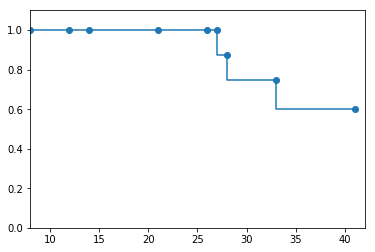

In [21]:
plt.step(new_df.iloc[:,0], survival(new_df), linestyle = '-', marker = 'o')
plt.xlim([8,42])
plt.ylim([0,1.1])

In [22]:
# We never reach the median value for this dataset, we may assume it as
# the value at 0.6, that is 41 years.

# Ques 2

Simulating data from an exponential distribution <br>
$f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$ <br>
Taken from numpy's page

In [56]:
# lambda = 2
data1 = np.random.exponential(scale = 0.5, size = 200).tolist()
# lambda = 4
data2 = np.random.exponential(scale = 0.25, size = 200).tolist()

(array([71., 52., 30., 16., 12., 11.,  3.,  1.,  2.,  2.]),
 array([1.86068052e-03, 2.33623903e-01, 4.65387125e-01, 6.97150347e-01,
        9.28913569e-01, 1.16067679e+00, 1.39244001e+00, 1.62420324e+00,
        1.85596646e+00, 2.08772968e+00, 2.31949290e+00]),
 <a list of 10 Patch objects>)

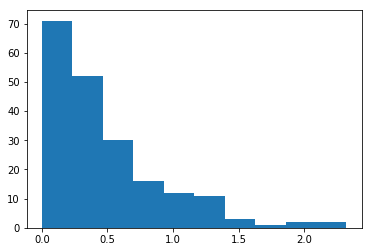

In [57]:
plt.hist(data1)

(array([76., 43., 26., 24., 15.,  4.,  7.,  1.,  2.,  2.]),
 array([0.00177864, 0.12328252, 0.24478639, 0.36629026, 0.48779413,
        0.609298  , 0.73080187, 0.85230574, 0.97380961, 1.09531348,
        1.21681735]),
 <a list of 10 Patch objects>)

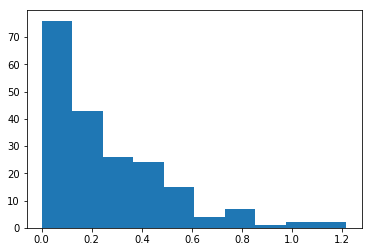

In [58]:
plt.hist(data2)

In [59]:
# censoring with a probability of 10%
censor1 = np.random.choice(2, size = 100, p = [0.9,0.1]).tolist()
censor2 = np.random.choice(2, size = 100, p = [0.9, 0.1]).tolist()

In [60]:
int_data1 = [int(x*1000) for x in data1]
int_data2 = [int(x*1000) for x in data2]

In [61]:
set1 = set(sorted(int_data1))
set2 = set(sorted(int_data2))

In [62]:
sample1 = sorted(sample(list(set1), 100))
sample2 = sorted(sample(list(set2), 100))

In [63]:
# deaths
death1 = np.random.choice(2, size = 100, p = [0.3, 0.7]).tolist()
death2 = np.random.choice(2, size = 100, p = [0.3, 0.7]).tolist()

In [64]:
mera_df = pd.DataFrame({'Time':sample1,
                        'Risk1':[100 for _ in range(100)],
                       'Death1':death1,
                       'Censor1':censor1})
mera_df2 = pd.DataFrame({'Time':sample2,
                        'Risk2':[100 for _ in range(100)],
                       'Death2':death2,
                       'Censor2':censor2})

$N_{t+1} = N_t - D_t - C_t$

In [65]:
for i in range(1,mera_df.shape[0]):
    mera_df.iloc[i,1] = mera_df.iloc[i-1,1] - mera_df.iloc[i-1,2] - mera_df.iloc[i-1,3]
for i in range(1,mera_df2.shape[0]):
    mera_df2.iloc[i,1] = mera_df2.iloc[i-1,1] - mera_df2.iloc[i-1,2] - mera_df2.iloc[i-1,3]

In [66]:
mera_df.iloc[99,3] = mera_df.iloc[99,1]
mera_df2.iloc[99,3] = mera_df2.iloc[99,1]

In [70]:
surv1 = survival(mera_df)
surv2 = survival(mera_df2)

(0, 2681)

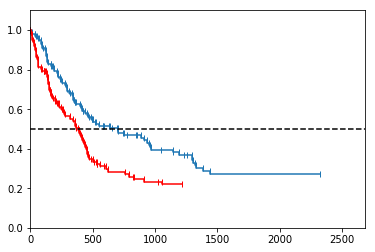

In [71]:
plt.step(mera_df.iloc[:,0], surv1, linestyle = '-', marker = '|')
plt.step(mera_df2.iloc[:,0], surv2, linestyle = '-', marker = '|', color = 'red')
plt.axhline(0.5, linestyle = '--', color = 'black')
plt.ylim([0,1.1])
plt.xlim([0, 2681])

In [39]:
#surv1.index( 0.505895437823829)

In [40]:
#surv2.index( 0.5098612291287132)

In [41]:
mera_df.iloc[92,:]

Time       1259
Risk1        28
Death1        1
Censor1       0
Name: 92, dtype: int64

In [42]:
mera_df2.iloc[70,:]

Time       355
Risk2       44
Death2       0
Censor2      0
Name: 70, dtype: int64

In [43]:
# For choice of stochastic parameters -
# The median survival for group 1 is 1287 units
# The median survival for group 2 is 286 units.

In [44]:
# Logrank test

In [45]:
mera_df.iloc[1:5,:]

,Time,Risk1,Death1,Censor1
1,12,99,0,0
2,18,99,1,0
3,31,98,1,0
4,32,97,1,0


In [46]:
mera_df2.iloc[1:5,:]

,Time,Risk2,Death2,Censor2
1,3,99,0,0
2,4,99,1,1
3,9,97,1,0
4,11,96,1,0


In [47]:
e1t = []
e2t = []
for i in range(lr_df.shape[0]):
    e1t.append(n1t[i]*(ot[i]/nt[i]))
    e2t.append(n2t[i]*(ot[i]/nt[i]))
    
def logrank(df, exp1, exp2):
    ojt = sum(df['Number_ofEvents_Grp1'].tolist())
    ojt2 = sum(df['Number_ofEvents_Grp2'].tolist())
    e1t = sum(exp1)
    e2t = sum(exp2)
    temp = [((ojt - e1t)**2)/(e1t),((ojt2 - e2t)**2)/(e2t)]
    return sum(temp)

logrank(lr_df, e1t, e2t)

6.148087536256202

In [51]:
e1t = []
e2t = []
for i in range(mera_df.shape[0]):
    e1t.append(mera_df.iloc[i,1] * ((mera_df.iloc[i,2]+mera_df2.iloc[i,2])/(mera_df.iloc[i,1]+mera_df2.iloc[i,1])))
    e2t.append(mera_df2.iloc[i,1] * ((mera_df.iloc[i,2]+mera_df2.iloc[i,2])/(mera_df.iloc[i,1]+mera_df2.iloc[i,1])))

In [52]:
def logrank2(mera_df, mera_df2, exp1, exp2):
    ojt = sum(mera_df['Death1'].tolist() + mera_df['Censor1'].tolist())
    ojt2 = sum(mera_df2['Death2'].tolist() + mera_df2['Censor2'].tolist())
    e1t = sum(exp1)
    e2t = sum(exp2)
    temp = [((ojt - e1t)**2)/(e1t),((ojt2 - e2t)**2)/(e2t)]
    return sum(temp)

In [53]:
logrank2(mera_df, mera_df2, e1t, e2t)

24.375952598006688

We now need the critical value of the $\chi^2$ distribution at $\alpha$ = 0.05.<br>
Tabular $\chi^2_{0.05}$ = 3.841<br>
Since the calculated value is higher than the tabular value, <br>
We reject the null hypothesis that there is no difference in the two groups.